In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
file_path = "Power.csv"
data = pd.read_csv(file_path, skiprows=15, delimiter=";")

In [3]:
data

,Min.(W),Max.(W),Percentage(%),Count
0,"0,58145","0,58318","10,3",9408.0
1,"0,58318","0,58491","16,2",14837.0
2,"0,58491","0,58664","9,6",8834.0
3,"0,58664","0,58837","10,9",9999.0
4,"0,58837","0,5901","13,6",12499.0
5,"0,5901","0,59183","14,0",12838.0
6,"0,59183","0,59356","12,7",11615.0
7,"0,59356","0,59529","2,3",2072.0
8,"0,59529","0,59702","4,4",4025.0
9,"0,59702","0,59875","6,2",5649.0


In [4]:
power_file = "squeezing_temp.csv"
power_data = pd.read_csv(power_file, delimiter=",")

In [5]:
def sinc_fun(T, A, b, T0):
    return A*(np.sinc(b*(T-T0)))**2

In [6]:
init = [1, 1, 40]
params, p_conv = curve_fit(sinc_fun, power_data['Temperature'], power_data['Power'], p0=init)

In [7]:
params

array([1.89650217e-02, 2.80309047e-01, 4.07968839e+01])

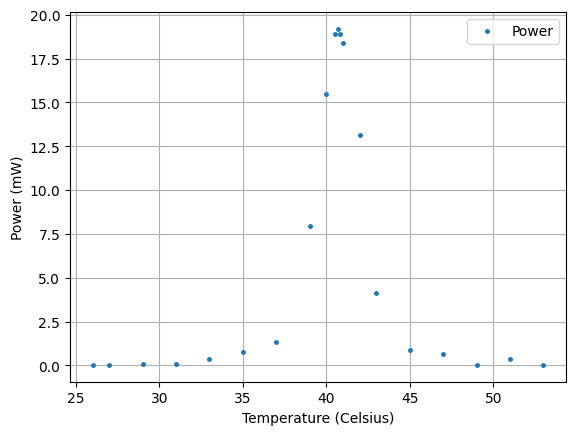

In [8]:
T = np.arange(power_data["Temperature"].min(), power_data["Temperature"].max(), 0.1)
plt.plot(power_data["Temperature"], power_data["Power"]*1000, '.', color ='C0', markersize=5, label='Power')

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Power (mW)')
plt.grid()
plt.legend()
plt.savefig('power_vs_temp.png', dpi=300)

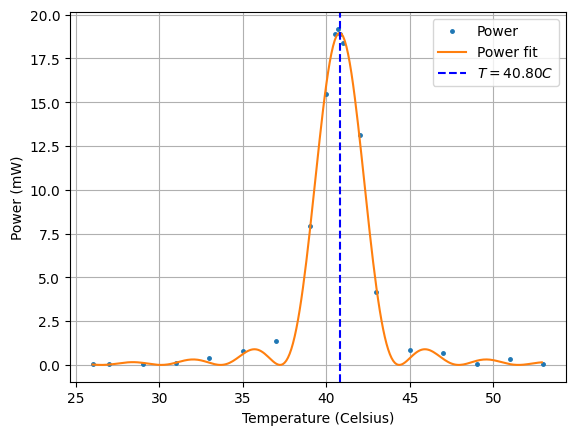

In [9]:
plt.plot(power_data["Temperature"], power_data["Power"]*1000, '.', color ='C0', markersize=5, label='Power')
plt.plot(T, sinc_fun(T, *params)*1000, color ='C1', markersize=5, label='Power fit')
plt.axvline(x=params[2], color='blue', linestyle='--', label=f'$T = {params[2]:.2f} C$')

plt.xlabel('Temperature (Celsius)')
plt.ylabel('Power (mW)')
plt.grid()
plt.legend()
plt.savefig('power_fit.png', dpi=300)

In [10]:
power_data

,Temperature,Power,std
0,26.0,0.000040,5.300000e-08
1,27.0,0.000032,2.180000e-07
2,29.0,0.000057,5.770000e-07
3,31.0,0.000086,9.330000e-07
4,33.0,0.000373,1.229600e-05
5,35.0,0.000790,2.558100e-05
6,37.0,0.001343,9.200000e-05
7,39.0,0.007946,3.000000e-05
8,40.0,0.015474,5.000000e-05
9,40.5,0.018915,1.300000e-05


In [11]:
shot_noise = -97.18
dark_noise = -98.39

delta_noise = shot_noise - dark_noise

max_power = 0.08
alpha = 0.764
PSHG = 0.5 * max_power

eta = 0.6 * 0.9 * 0.77 * 0.83 * 0.95 * 0.8

R = np.sqrt(alpha * PSHG)
Vplus = np.exp(2*R) * eta + 1 - eta
Vminus = np.exp(-2*R) * eta + 1 - eta
print(Vminus, Vplus)

0.9226123317745109 1.1097775248910087


In [20]:
 np.exp(-2*R), np.exp(2*R),

(np.float64(0.704950018706675), np.float64(1.418540284366023))

In [22]:
PSHG, R, eta

(0.04, np.float64(0.17481418706729726), 0.26228664)

In [13]:
delta_noise # explain the separation between shot and dark noise

1.2099999999999937

In [14]:
anti = [-96.93, -97.00, -96.97, -96.95, -96.9, -96.95]
squ = [-97.44, -97.39, -97.41, -97.44, -97.44, -97.46]
shot = -97.23

anti_squeezing = []
squeezing = []

for i in range(len(anti)):
    anti_squeezing.append(abs(anti[i] - shot))
    squeezing.append(abs(squ[i] - shot))

In [15]:
anti_squeezing

[0.29999999999999716,
 0.23000000000000398,
 0.2600000000000051,
 0.28000000000000114,
 0.3299999999999983,
 0.28000000000000114]

In [16]:
squeezing

[0.20999999999999375,
 0.1599999999999966,
 0.1799999999999926,
 0.20999999999999375,
 0.20999999999999375,
 0.22999999999998977]

In [17]:
# Convert dB to unitless
unitless_values = 10 ** (np.mean(np.array(anti_squeezing)) / 10)
print("Anti-Squeezing:", unitless_values)

Anti-Squeezing: 1.0665961212302582


In [18]:
# Convert -dB to unitless
negative_unitless_values = 10 ** (-np.mean(np.array(squeezing)) / 10)
print("Squeezing:", negative_unitless_values)

Squeezing: 0.9549925860214374


In [21]:
np.mean(np.array(anti_squeezing)), np.mean(np.array(squeezing))

(np.float64(0.28000000000000114), np.float64(0.19999999999999338))